In [2]:
from morphonet.data import get_local_dataset,list_local_datasets
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

This Jupyter notebook is made to compare the evolution of cell count of the curation, between 2 steps of the curation. 

You will need to specify the following to start the code , everything else is done automatically

In [3]:
datasets_available = list_local_datasets()
chosen_set = widgets.Dropdown(
    options=datasets_available,
    description='Dataset:',
    disabled=False,
)
display(chosen_set)

Dropdown(description='Dataset:', options=('170728-Samson-St8_post_t001', '170728-Samson-St8_post_t001', '17072…

In [4]:
# set the name of the dataset in MorphoNet
dataset_name =  chosen_set.value

dataset = get_local_dataset(dataset_name)
if dataset is None :
    datasets_available = list_local_datasets()
    print("Dataset not found, please make sure it exists or there are no typos in the dataset name")
    print(" Here is the list of dataset available : ")
    for dataset in datasets_available:
        print(dataset)
    exit()
else :
    print("Dataset found")
# name of the property used to generate cell count
properties  = dataset.list_all_properties()
chosen_prop = widgets.Dropdown(
    options=properties,
    description='Property to use :',
    disabled=False,
)
display(chosen_prop)

Dataset found


Dropdown(description='Property to use :', options=('axis_minor_length', 'axis_ratio', 'bbox', 'cell_barycenter…

First we are going to pick the dataset in MorphoNet temporary files

In [10]:
min_step = 0
max_step = dataset.get_number_of_curations()

print("Dataset steps ranges : "+str(min_step)+" -> "+str(max_step))

print("Pick the first step you want to compare")
min_step_chosen = widgets.BoundedIntText(
    value=min_step,
    min=0,
    max=max_step,
    step=1,
    description='First Step:',
    disabled=False
)
display(min_step_chosen)

max_step_chosen = widgets.BoundedIntText(
    value=max_step,
    min=0,
    max=max_step,
    step=1,
    description='Second Step:',
    disabled=False
)
display(max_step_chosen)

Dataset steps ranges : 0 -> 1046
Pick the first step you want to compare


BoundedIntText(value=0, description='First Step:', max=1046)

BoundedIntText(value=1046, description='Second Step:', max=1046)

Now that we chose the steps , we will display the comparison of cell counts

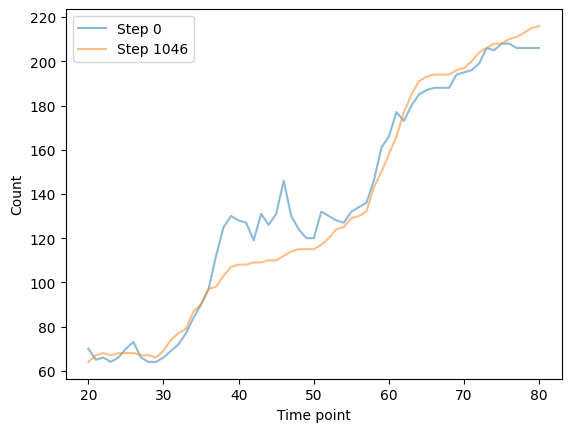

In [11]:
count_prev = []
count = []
times = []
previous_volume_property = dataset.get_property(chosen_prop.value,step=int(min_step_chosen.value))
volume_property = dataset.get_property(chosen_prop.value,step=int(max_step_chosen.value))
if volume_property is not None and previous_volume_property is not None:
    for time in range(dataset.min_time,dataset.max_time+1):
        idprev = previous_volume_property.get_object_ids_at(time)
        idcurr = volume_property.get_object_ids_at(time)
        count_prev.append(len(idprev))
        count.append(len(idcurr))
        times.append(time)
    plt.plot(times,count,label="Step "+str(min_step_chosen.value),alpha=0.5)
    plt.plot(times,count_prev,label="Step "+str(max_step_chosen.value),alpha=0.5)
    plt.xlabel("Time point")
    plt.legend()
    plt.ylabel("Count")
    plt.show()